In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/home/arnav/anaconda3/envs/deeplearning/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/arnav/anaconda3/envs/deeplearning/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
import numpy as np

def vectorize(seq, dim=10000) :
    res = np.zeros((len(seq), dim))
    for i, s in enumerate(seq) :
        res[i, s] = 1
    return res

x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [3]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [4]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [5]:
#split training data into train and validation sets
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
18/18 [==============================] - 0s 17ms/step - loss: 2.5374 - accuracy: 0.5109 - val_loss: 1.5981 - val_accuracy: 0.6560
Epoch 2/9
18/18 [==============================] - 0s 12ms/step - loss: 1.3859 - accuracy: 0.6995 - val_loss: 1.0651 - val_accuracy: 0.7670
Epoch 3/9
18/18 [==============================] - 0s 12ms/step - loss: 1.0094 - accuracy: 0.7801 - val_loss: 0.7827 - val_accuracy: 0.8340
Epoch 4/9
18/18 [==============================] - 0s 12ms/step - loss: 0.7744 - accuracy: 0.8359 - val_loss: 0.5874 - val_accuracy: 0.8890
Epoch 5/9
18/18 [==============================] - 0s 12ms/step - loss: 0.6067 - accuracy: 0.8731 - val_loss: 0.4441 - val_accuracy: 0.9100
Epoch 6/9
18/18 [==============================] - 0s 12ms/step - loss: 0.4798 - accuracy: 0.9014 - val_loss: 0.3547 - val_accuracy: 0.9350
Epoch 7/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3861 - accuracy: 0.9196 - val_loss: 0.2893 - val_accuracy: 0.9510
Epoch 8/9
18/18 [===

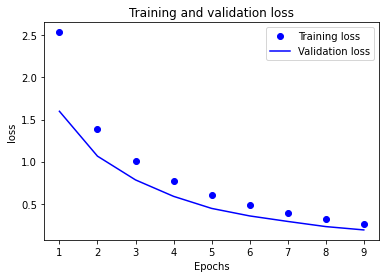

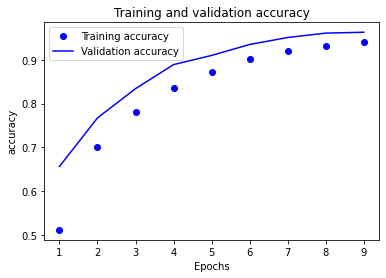

In [8]:
#plot the training and validation loss and accuracy
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [9]:
result = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 1ms/step - loss: 0.9339 - accuracy: 0.7961
